In [1]:
import os
os.chdir(os.path.join(os.getcwd(),'../..'))

In [2]:
import numpy as np
import pandas as pd
import cobra as cb

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
np.set_printoptions(threshold=np.nan)

In [3]:
# run to regenerate network model and analysis

! python main.py generate_unicellular_network
! mv ../outputs/unicellular.json ../dataset/network/

! python main.py analysis_unicellular
! mv ../outputs/unicellular_analysis.json ../dataset/solutions/

unknown metabolite 'Glucose' created
unknown metabolite 'CO2' created
unknown metabolite 'Glyoxylate' created
unknown metabolite 'Acetate' created
unknown metabolite 'Lactate' created
unknown metabolite 'Ethanol' created


In [21]:
from services import DataReader
from cameo.flux_analysis.simulation import fba

unicellular_model = DataReader().read_network_model('unicellular')

unicellular_model.objective = {
    unicellular_model.reactions.get_by_id('G6P->6PG'): 1,
    unicellular_model.reactions.get_by_id('MAL<->OAA'): -1,
    unicellular_model.reactions.get_by_id('F1,6P->DHAP+G3P'): 1
}

solution = unicellular_model.optimize()
pd.Series(unicellular_model.solution.x_dict)

(Cellconsumption)->Glucose     666.666667
2KG->(Cellsynthesis)             0.000000
2KG->SUC+CO2                     0.000000
3PG->(Cellsynthesis)             0.000000
3PG<->PEP                     1000.000000
6PG->G3P+PYR                     0.000000
6PG->Ru5P+CO2                 1000.000000
AcCoA+OAA->CIT                   0.000000
AcCoA->(Cellsynthesis)           0.000000
AcCoA->Acetate                   0.000000
AcCoA->Ethanol                   0.000000
Acetate->(Cellsynthesis)         0.000000
CIT->ICT                         0.000000
CO2->(Evolution)              1000.000000
DHAP->G3P                      333.333333
E4P->(Cellsynthesis)             0.000000
Ethanol->(Cellsynthesis)         0.000000
F1,6P->DHAP+G3P                333.333333
F6P->(Cellsynthesis)             0.000000
F6P->F1,6P                     333.333333
FUM->MAL                         0.000000
G3P->(Cellsynthesis)             0.000000
G3P->3PG                      1000.000000
G6P->(Cellsynthesis)             0

In [22]:
import escher

b = escher.Builder(
    map_json='../dataset/visualizations/unicellular_map.json', 
    model=unicellular_model, 
    reaction_data=unicellular_model.solution.x_dict)
b.display_in_notebook()

In [6]:
from services import NamingService
from preprocessing import DynamicPreprocessing

df_metabolites = pd.DataFrame.from_csv('../dataset/unicellular/unicellular_metabolites.csv').fillna(0)

X_metabolites = df_metabolites.to_dict().values()
y_metabolites = df_metabolites.to_dict().keys()

y_metabolites = ['h' if i.startswith('RF') else i for i in y_metabolites]

X_metabolites_t = NamingService('unicellular').to(list(X_metabolites))
X_metabolites_t = DynamicPreprocessing(['metabolic-standard']).fit_transform(X_metabolites_t, y_metabolites)

df_metabolites = pd.DataFrame.from_records(X_metabolites_t)
df_metabolites.index = y_metabolites
df_metabolites

,3PG,6PG,CIT,DHAP,F6P,FUM,G1P,G6P,MAL,PEP,PYR,R5P,Ru5P,S7P,SUC
KO07,-0.117202,0.01310,0.03180,-0.577350,-0.695621,1.363738,-0.984585,-1.908696,1.016092,-0.013671,0.153,-0.892699,-2.249443,-1.190832,0.100382
h,-1.378522,NaN,NaN,-0.577350,1.310796,-0.880585,-0.961886,-0.452911,0.908314,-0.921407,NaN,-0.892699,-1.388786,1.716654,-1.701600
KO17,0.303238,0.66800,NaN,-0.508985,-0.563122,1.086661,-0.265015,1.649889,1.676941,0.473007,0.270,0.815859,-4.291546,-1.500140,0.854472
KO06,0.024185,NaN,0.04660,-0.577350,0.847048,2.129162,-0.684954,-0.032351,3.095073,-0.079290,0.254,-0.892699,-0.215164,-0.665010,0.537820
KO13,0.671588,NaN,NaN,-0.577350,2.399182,1.055490,-1.336426,1.746942,1.308227,1.252238,NaN,-0.273460,0.942810,-0.912456,1.347406
KO22,-0.853902,NaN,NaN,-0.577350,3.146856,0.179234,-0.891518,-2.652763,-0.112741,-0.682169,0.130,5.570895,7.515095,-1.562001,-0.748377
h,0.262310,NaN,NaN,1.732051,-1.452759,0.210405,1.253573,-0.938172,-0.050344,0.371844,NaN,-0.892699,-0.207340,-0.355703,0.844679
h,-0.280913,NaN,NaN,-0.577350,-0.212945,-0.880585,0.708788,1.682240,-1.613125,-0.921407,NaN,1.530019,1.412259,-0.665010,0.319101
KO20,0.143247,NaN,0.03430,-0.577350,16.065528,0.445921,-0.205997,3.267428,-0.662977,0.024607,0.191,9.593692,21.050873,0.649545,-0.402345
KO02,-1.006451,0.00778,0.02480,-0.577350,-0.828120,0.923878,-1.447653,-3.882093,0.502728,-0.545462,0.135,0.345780,-3.360472,-2.080090,0.221167


In [7]:
from services import DataReader

X, y = DataReader().read_analyze_solution('unicellular_analysis', gz=False)

In [8]:
from preprocessing import ReactionDiffScaler

X_diff = ReactionDiffScaler(dataset_name='unicellular').fit_transform(X, y)

In [9]:
from sklearn.preprocessing import StandardScaler

df_flux = pd.DataFrame.from_csv('../dataset/unicellular/unicellular_flux.csv').fillna(0)

# df_flux[df_flux.columns] = StandardScaler().fit_transform(df_flux.T).T 

df_flux

,KO01#galM,KO02#glk,KO03#pgm,KO04#pgi,KO05#pfkA_2,KO06#pfkB,KO07#fbp,KO08#fbaB,KO09#gapC,KO10#gpmA,KO11#gpmB,KO12#pykA,KO13#pykF,KO14#ppsA,KO15#zwf,KO16#pgl,KO17#gnd,KO18#rpe,KO19#rpiA,KO20#rpiB,KO21#tktA,KO22#tktB,KO23#talA,KO24#talB,RF03#WT(Jun),RF04#WT(Jul),RF05#WT(Sep),RF06#WT(Oct)
Glucose + PEP -> G6P + PYR,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
G6P <-> F6P,64.00,87.00,78.00,0.00,84.00,52.00,85.00,73.00,63.00,83.00,88.00,74.00,47.00,68.00,99.00,78.00,99.00,92.00,67.00,51.00,78.00,86.00,85.00,86.00,87.00,85.00,80.00,60.00
"F6P -> F1,6P",81.00,89.00,86.00,34.00,87.00,77.00,87.00,83.00,80.00,86.00,90.00,84.00,75.00,82.00,93.00,86.00,93.00,92.00,69.00,79.00,79.00,88.00,87.00,88.00,89.00,87.00,86.00,79.00
"F1,6P -> DHAP + G3P",81.00,89.00,86.00,34.00,87.00,77.00,87.00,83.00,80.00,86.00,90.00,84.00,75.00,82.00,93.00,86.00,93.00,92.00,69.00,79.00,79.00,88.00,87.00,88.00,89.00,87.00,86.00,79.00
DHAP -> G3P,81.00,89.00,86.00,34.00,87.00,77.00,87.00,83.00,80.00,86.00,90.00,84.00,75.00,82.00,93.00,86.00,93.00,92.00,69.00,79.00,79.00,88.00,87.00,88.00,89.00,87.00,86.00,79.00
G3P -> 3PG,168.00,177.00,173.00,120.00,173.00,163.00,173.00,169.00,168.00,172.00,178.00,170.00,161.00,170.00,181.00,173.00,182.00,181.00,157.00,169.00,171.00,175.00,174.00,175.00,178.00,173.00,173.00,164.00
3PG <-> PEP,159.00,167.00,164.00,109.00,162.00,153.00,162.00,159.00,158.00,161.00,169.00,160.00,150.00,160.00,171.00,162.00,173.00,173.00,148.00,162.00,164.00,165.00,163.00,165.00,169.00,162.00,162.00,153.00
PEP -> PYR,55.00,51.00,50.00,5.00,43.00,49.00,57.00,45.00,54.00,41.00,55.00,51.00,46.00,35.00,68.00,51.00,67.00,70.00,45.00,52.00,48.00,40.00,39.00,41.00,48.00,46.00,46.00,49.00
PYR -> AcCoA + CO2,141.00,132.00,130.00,122.00,120.00,130.00,142.00,123.00,144.00,118.00,137.00,129.00,132.00,114.00,156.00,131.00,149.00,153.00,145.00,138.00,147.00,120.00,117.00,121.00,130.00,137.00,125.00,126.00
G6P -> 6PG,35.00,12.00,21.00,98.00,14.00,47.00,14.00,25.00,36.00,16.00,11.00,24.00,52.00,31.00,0.00,20.00,0.00,7.00,31.00,48.00,21.00,13.00,13.00,13.00,11.00,14.00,18.00,39.00


In [10]:
df_min_max = pd.DataFrame.from_records(X)
df_min_max.index = y
df_min_max

,(Cellconsumption)->Glucose_max,(Cellconsumption)->Glucose_min,2KG->(Cellsynthesis)_max,2KG->(Cellsynthesis)_min,2KG->SUC+CO2_max,2KG->SUC+CO2_min,3PG->(Cellsynthesis)_max,3PG->(Cellsynthesis)_min,3PG<->PEP_max,3PG<->PEP_min,6PG->G3P+PYR_max,6PG->G3P+PYR_min,6PG->Ru5P+CO2_max,6PG->Ru5P+CO2_min,AcCoA+OAA->CIT_max,AcCoA+OAA->CIT_min,AcCoA->(Cellsynthesis)_max,AcCoA->(Cellsynthesis)_min,AcCoA->Acetate_max,AcCoA->Acetate_min,AcCoA->Ethanol_max,AcCoA->Ethanol_min,Acetate->(Cellsynthesis)_max,Acetate->(Cellsynthesis)_min,CIT->ICT_max,CIT->ICT_min,CO2->(Evolution)_max,CO2->(Evolution)_min,DHAP->G3P_max,DHAP->G3P_min,E4P->(Cellsynthesis)_max,E4P->(Cellsynthesis)_min,Ethanol->(Cellsynthesis)_max,Ethanol->(Cellsynthesis)_min,"F1,6P->DHAP+G3P_max","F1,6P->DHAP+G3P_min",F6P->(Cellsynthesis)_max,F6P->(Cellsynthesis)_min,"F6P->F1,6P_max","F6P->F1,6P_min",FUM->MAL_max,FUM->MAL_min,G3P->(Cellsynthesis)_max,G3P->(Cellsynthesis)_min,G3P->3PG_max,G3P->3PG_min,G6P->(Cellsynthesis)_max,G6P->(Cellsynthesis)_min,G6P->6PG_max,G6P->6PG_min,G6P<->F6P_max,G6P<->F6P_min,Glucose+PEP->G6P+PYR_max,Glucose+PEP->G6P+PYR_min,Glyoxylate+AcCoA->MAL_max,Glyoxylate+AcCoA->MAL_min,ICT->2KG+CO2_max,ICT->2KG+CO2_min,ICT->Glyoxylate+SUC_max,ICT->Glyoxylate+SUC_min,Lactate->(Cellsynthesis)_max,Lactate->(Cellsynthesis)_min,MAL->PYR+CO2_max,MAL->PYR+CO2_min,MAL<->OAA_max,MAL<->OAA_min,OAA->(Cellsynthesis)_max,OAA->(Cellsynthesis)_min,PEP+CO2<->OAA_max,PEP+CO2<->OAA_min,PEP->(Cellsynthesis)_max,PEP->(Cellsynthesis)_min,PEP->PYR_max,PEP->PYR_min,PYR->(Cellsynthesis)_max,PYR->(Cellsynthesis)_min,PYR->AcCoA+CO2_max,PYR->AcCoA+CO2_min,PYR->Lactate_max,PYR->Lactate_min,R5P+X5P<->S7P+G3P_max,R5P+X5P<->S7P+G3P_min,R5P->(Cellsynthesis)_max,R5P->(Cellsynthesis)_min,Ru5P->R5P_max,Ru5P->R5P_min,Ru5P->X5P_max,Ru5P->X5P_min,S7P+G3P<->E4P+F6P_max,S7P+G3P<->E4P+F6P_min,SUC->FUM_max,SUC->FUM_min,X5P+E4P<->F6P+G3P_max,X5P+E4P<->F6P+G3P_min
KO22,1000.0,0.0,538.461538,0.0,500.0,0.0,777.777778,0.0,1000.0,-1.705303e-13,1000.0,0.0,1000.0,0.0,692.307692,0.0,1000.0,0.0,1000.0,0.0,1000.0,0.0,1000.0,0.0,692.307692,0.0,1000.0,0.0,1000.0,0.0,800.0,0.0,1000.0,0.0,1000.0,0.0,666.666667,0.0,1000.0,0.0,583.333333,0.0,1000.0,0.0,1000.0,-1.705303e-13,666.666667,0.0,1000.0,0.0,1000.0,-666.666667,1000.0,0.0,500.0,0.0,636.363636,0.0,500.0,0.0,1000.0,0.0,833.333333,0.0,1000.0,-500.0,833.333333,0.0,500.0,-333.333333,777.777778,0.0,833.333333,0.0,1000.0,0.0,1000.0,0.0,1000.0,0.0,500.0,0.0,571.428571,0.0,600.0,0.0,666.666667,0.0,500.0,0.0,583.333333,0.0,333.333333,-400.0
KO03,1000.0,0.0,538.461538,0.0,500.0,0.0,777.777778,0.0,1000.0,-1.705303e-13,1000.0,0.0,1000.0,0.0,692.307692,0.0,1000.0,0.0,1000.0,0.0,1000.0,0.0,1000.0,0.0,692.307692,0.0,1000.0,0.0,1000.0,0.0,800.0,0.0,1000.0,0.0,1000.0,0.0,666.666667,0.0,1000.0,0.0,583.333333,0.0,1000.0,0.0,1000.0,-1.705303e-13,666.666667,0.0,1000.0,0.0,1000.0,-666.666667,1000.0,0.0,500.0,0.0,636.363636,0.0,500.0,0.0,1000.0,0.0,833.333333,0.0,1000.0,-500.0,833.333333,0.0,500.0,-333.333333,777.777778,0.0,833.333333,0.0,1000.0,0.0,1000.0,0.0,1000.0,0.0,500.0,0.0,571.428571,0.0,600.0,0.0,666.666667,0.0,500.0,0.0,583.333333,0.0,333.333333,-400.0
KO14,1000.0,0.0,538.461538,0.0,500.0,0.0,777.777778,0.0,1000.0,-1.705303e-13,1000.0,0.0,1000.0,0.0,692.307692,0.0,1000.0,0.0,1000.0,0.0,1000.0,0.0,1000.0,0.0,692.307692,0.0,1000.0,0.0,1000.0,0.0,800.0,0.0,1000.0,0.0,1000.0,0.0,666.666667,0.0,1000.0,0.0,583.333333,0.0,1000.0,0.0,1000.0,-1.705303e-13,666.666667,0.0,1000.0,0.0,1000.0,-666.666667,1000.0,0.0,500.0,0.0,636.363636,0.0,500.0,0.0,1000.0,0.0,833.333333,0.0,1000.0,-500.0,833.333333,0.0,500.0,-333.333333,777.777778,0.0,833.333333,0.0,1000.0,0.0,1000.0,0.0,1000.0,0.0,500.0,0.0,571.428571,0.0,600.0,0.0,666.666667,0.0,500.0,0.0,583.333333,0.0,333.333333,-400.0
KO20,1000.0,0.0,538.461538,0.0,500.0,0.0,777.777778,0.0,1000.0,-1.705303e-13,1000.0,0.0,1000.0,0.0,692.307692,0.0,1000.0,0.0,1000.0,0.0,1000.0,0.0,1000.0,0.0,692.307692,0.0,1000.0,0.0,1000.0,0.0,800.0,0.0,1000.0,0.0,1000.0,0.0,66

In [11]:
df_diff = pd.DataFrame.from_records(X_diff)
df_diff.index = y
df_diff

,(Cellconsumption)->Glucose_dif,2KG->(Cellsynthesis)_dif,2KG->SUC+CO2_dif,3PG->(Cellsynthesis)_dif,3PG<->PEP_dif,6PG->G3P+PYR_dif,6PG->Ru5P+CO2_dif,AcCoA+OAA->CIT_dif,AcCoA->(Cellsynthesis)_dif,AcCoA->Acetate_dif,AcCoA->Ethanol_dif,Acetate->(Cellsynthesis)_dif,CIT->ICT_dif,CO2->(Evolution)_dif,DHAP->G3P_dif,E4P->(Cellsynthesis)_dif,Ethanol->(Cellsynthesis)_dif,"F1,6P->DHAP+G3P_dif",F6P->(Cellsynthesis)_dif,"F6P->F1,6P_dif",FUM->MAL_dif,G3P->(Cellsynthesis)_dif,G3P->3PG_dif,G6P->(Cellsynthesis)_dif,G6P->6PG_dif,G6P<->F6P_dif,Glucose+PEP->G6P+PYR_dif,Glyoxylate+AcCoA->MAL_dif,ICT->2KG+CO2_dif,ICT->Glyoxylate+SUC_dif,Lactate->(Cellsynthesis)_dif,MAL->PYR+CO2_dif,MAL<->OAA_dif,OAA->(Cellsynthesis)_dif,PEP+CO2<->OAA_dif,PEP->(Cellsynthesis)_dif,PEP->PYR_dif,PYR->(Cellsynthesis)_dif,PYR->AcCoA+CO2_dif,PYR->Lactate_dif,R5P+X5P<->S7P+G3P_dif,R5P->(Cellsynthesis)_dif,Ru5P->R5P_dif,Ru5P->X5P_dif,S7P+G3P<->E4P+F6P_dif,SUC->FUM_dif,X5P+E4P<->F6P+G3P_dif
KO22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KO03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KO14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KO20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KO24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KO02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KO15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KO01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
h,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
h,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline

vect = DictVectorizer(sparse=False)
flux_dict = df_flux.to_dict()
X_c_flux = [{k.replace(' ', ''): v for k, v in x.items()} for x in list(flux_dict.values())] 
X_v_flux = vect.fit_transform(X_c_flux, len(flux_dict.keys()))

X_c_diff = [{k[:-4]: v for k, v in x.items()} for x in X_diff]
X_v_diff = vect.transform(X_c_diff)

scaler = MinMaxScaler()
X_v_flux = scaler.fit_transform(X_v_flux, len(flux_dict.keys()))
X_v_diff = scaler.fit_transform(X_v_diff)

In [13]:
from functional import seq 

X_sv_flux = np.array(seq(X_v_flux)
                     .zip(flux_dict.keys())
                     .filter(lambda x: not x[1].startswith('RF'))
                     .order_by(lambda k: k[1])
                     .map(lambda x: x[0])
                     .to_list())

X_sv_diff = np.array(seq(X_v_diff)
                     .zip(y)
                     .filter(lambda x: x[1] != 'h')
                     .order_by(lambda k: k[1])
                     .map(lambda x: x[0])
                     .to_list())

In [14]:
ds_flux = np.array([x.mean() for x in X_sv_flux])
ds_diff = np.array([x.mean() for x in X_sv_diff])
diff_size_for_analysis = ds_flux - ds_diff

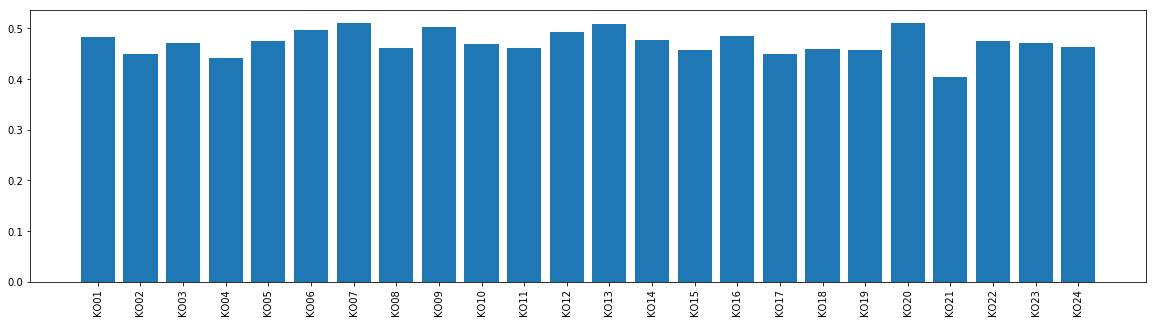

In [15]:
import matplotlib.pyplot as plt

dx = range(len(diff_size_for_analysis))
dy = diff_size_for_analysis
labels = sorted(filter(lambda x: x != 'h', y))

plt.figure(figsize=(20, 5))
plt.bar(dx, dy)
plt.xticks(dx, labels, rotation='vertical')
plt.show()

In [16]:
np.array(diff_size_for_analysis).mean()

0.47244398201743393

In [17]:
from scipy import stats

stats.ttest_ind(ds_flux, ds_diff)

Ttest_indResult(statistic=93.175882460016155, pvalue=4.6987630093372047e-54)